# Validation Set

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import pickle
import notebookfns as n

In [113]:
fname = './results/Vanderpol_2019_04_26_02_46_47_502477_model.pkl'
with open(fname, 'rb') as f:
    params = pickle.load(f, encoding='latin1')

In [114]:
X = np.loadtxt('./data/Van_Der_Pol/Vanderpol_val_x.csv',delimiter=',')

In [115]:
# reshape the validation data
max_shifts_to_stack = n.num_shifts_in_stack(params)
X_stacked, num_traj_val = n.stack_data(X, max_shifts_to_stack, params['len_time'])

### Reconstruction

In [116]:
W, b = n.load_weights_koopman(fname, len(params['widths'])-1, len(params['widths_omega_real'])-1, params['num_real'], params['num_complex_pairs'])

In [117]:
y, g_list = n.ApplyKoopmanNetOmegasFull(X_stacked, W, b, params['delta_t'], params['num_shifts'], params['num_shifts_middle'], params['num_real'], params['num_complex_pairs'], params['num_encoder_weights'], params['num_omega_weights'], params['num_decoder_weights'])

In [118]:
y = np.array(y)

Text(0.5, 1.0, 'Reconstruction')

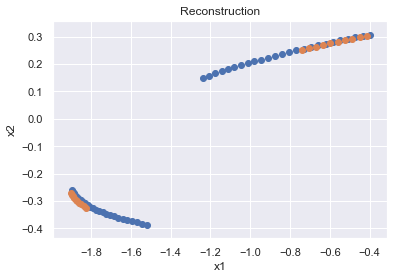

In [125]:
plt.scatter(X_stacked[0:25,0],X_stacked[0:25,1])
plt.scatter(y[0:10,0],y[0:10,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Reconstruction')

In [ ]:
plt.scatter(X_stacked[:,0],X_stacked[:,1])
plt.scatter(y[:,0],y[:,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Reconstruction')

### Initial Conditions

In [82]:
data = np.squeeze(X_stacked[0,:,:])
xvals = np.linspace(-3.1,3.1,300)
yvals = np.linspace(np.min(data[:,1]),np.max(data[:,1]),300)
X, Y = np.meshgrid(xvals, yvals)

grid = np.zeros((90000,2))
grid[:,0] = np.reshape(X, (90000,))
grid[:,1] = np.reshape(Y, (90000,))

In [83]:
grid_yk, grid_ykplus1, grid_ykplus2, grid_ykplus3, grid_xk_recon, grid_xkplus1, grid_xkplus2, grid_xkplus3 = n.ApplyKoopmanNetOmegas(grid, W, b, params['delta_t'], params['num_real'], params['num_complex_pairs'], params['num_encoder_weights'], params['num_omega_weights'], params['num_decoder_weights'])

### Intrinsic Coordinates

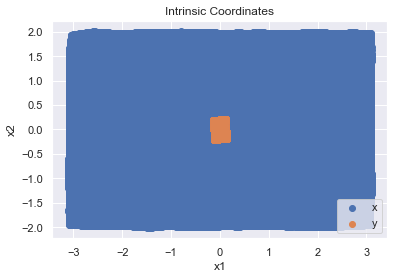

In [109]:
plt.scatter(np.array(grid_xk_recon[:,0]),np.array(grid_xk_recon[:,1]), label='x')
plt.scatter(np.array(grid_yk[:,0]),np.array(grid_yk[:,1]), label='y')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Intrinsic Coordinates')
plt.legend()
plt.show()

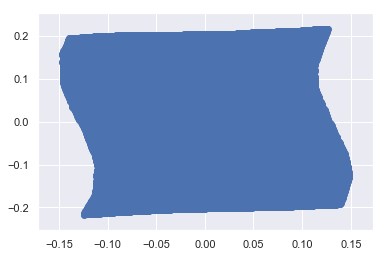

In [88]:
plt.scatter(np.array(grid_yk[:,0]),np.array(grid_yk[:,1]))

In [93]:
grid_reshaped0 = grid_yk[:,0].reshape(300,300)
grid_reshaped1 = grid_yk[:,1].reshape(300,300)
efn_magnitude = np.square(grid_reshaped0) + np.square(grid_reshaped1)
print('Eigenfunction ranges in magnitude from %.6f to %.6f' % (np.nanmin(efn_magnitude), np.nanmax(efn_magnitude)))

Eigenfunction ranges in magnitude from 0.000000 to 0.063265


In [105]:
loss1_train, loss2_train, loss3_train, loss_Linf_train, loss_train, regularized_loss_train, total_num_traj = n.loss_training(params, max_shifts_to_stack, W, b)
print("# training traj: %d (goes in Table 2)" % total_num_traj)
print("Note: accidentally reported in paper that we used more data than we did.")
print("See Vanderpol.m: used 5000*.7 = 3500 per file, not 5000")
print('Reconstruction loss (on train set): %.4E' % loss1_train)
print('Prediction loss (on train set): %.4E' % loss2_train)
print('Linearity loss (on train set): %.4E' % loss3_train)
print('L_inf loss (on train set): %.4E' % loss_Linf_train)
print('Pre-regularization loss (on train set): %.4E (goes in Table 1)' % loss_train)
print('Total regularized loss (on train set): %.4E' % regularized_loss_train)

file 1 has 3500 trajectories
file 2 has 3500 trajectories
file 3 has 3500 trajectories
file 4 has 3500 trajectories
file 5 has 3500 trajectories
file 6 has 3500 trajectories
# training traj: 21000 (goes in Table 2)
Note: accidentally reported in paper that we used more data than we did.
See Vanderpol.m: used 5000*.7 = 3500 per file, not 5000
Reconstruction loss (on train set): 9.6359E-08
Prediction loss (on train set): 1.2431E-07
Linearity loss (on train set): 5.8985E-07
L_inf loss (on train set): 1.0076E-09
Pre-regularization loss (on train set): 8.1153E-07 (goes in Table 1)
Total regularized loss (on train set): 8.1153E-07


# Test Set

In [94]:
loss1_test, loss2_test, loss3_test, loss_Linf_test, loss_test, regularized_loss_test = n.loss_test(params, max_shifts_to_stack, W, b)

test file has 500 trajectories


In [95]:
print('Reconstruction loss (on test set): %.4E' % loss1_test)
print('Prediction loss (on test set): %.4E' % loss2_test)
print('Linearity loss (on test set): %.4E' % loss3_test)
print('L_inf loss (on test set): %.4E' % loss_Linf_test)
print('Pre-regularization loss (on test set): %.4E (goes in Table 1)' % loss_test)
print('Total regularized loss (on test set): %.4E' % regularized_loss_test)

Reconstruction loss (on test set): 1.0786E-07
Prediction loss (on test set): 1.3144E-07
Linearity loss (on test set): 6.0807E-07
L_inf loss (on test set): 9.5245E-10
Pre-regularization loss (on test set): 8.4833E-07 (goes in Table 1)
Total regularized loss (on test set): 8.4833E-07
